In [271]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Preprocessing the raw data

In [272]:
# iterate over all WASDE csv files in the data folder and vertically concatenate them
path = 'data collection/WASDE data/*/*.csv'
all_files = glob.glob(path)
df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(832923, 16)


,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Beginning Stocks,NaN,Sugar,Mexico,2021/22,Est.,Annual,1053.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
1,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2021/22,Est.,Annual,4547.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
2,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2021/22,Est.,Annual,947.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
3,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2021/22,Est.,Annual,1794.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8
4,627,August 2022,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2021/22,Est.,Annual,50.0,"1000 Metric Tons, Actual Weight",2022-08-12,12:00:00.0000000,2022,8


In [273]:
crude_oil_df = pd.read_csv('data collection/Crude Oil WTI Futures Historical Data - daily data 10 years.csv')
gold_df = pd.read_csv('data collection/SPDR Gold Shares (GLD) - yahoo finance, 10 years.csv')
sp500_df = pd.read_csv('data collection/S&P 500 Historical Data - daily data 10 years.csv')
silver_df = pd.read_csv('data collection/Silver Futures Historical Data - daily data 10 years.csv')
corn_df = pd.read_csv('data collection/US Corn Futures Historical Data - daily data 10 years.csv')
dollar_rate_df = pd.read_csv('data collection/US Dollar Index Historical Data - daily data 10 years.csv')
soybean_df = pd.read_csv('data collection/US Soybeans Futures Historical Data - daily data 10 years.csv')

cpi_df = pd.read_csv('data collection/Customer Price Index.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m-%d')
cpi_df = cpi_df[cpi_df['DATE'] >= '2013-01']
cpi_df.rename(columns={'CPIAUCSL':'CPI', 'DATE':'Date'}, inplace=True)
ppi_df = pd.read_csv('data collection/Producer Price Index.csv')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m-%d')
ppi_df.rename(columns={'PPIACO':'PPI', 'DATE':'Date'}, inplace=True)
ppi_df
dfs_dict = {
    'crude_oil_df': crude_oil_df,
    #'food_price_df': food_price_df,
    'gold_df': gold_df,
    'sp500_df': sp500_df,
    'silver_df': silver_df,
    #'corn_df': corn_df,
    'dollar_rate_df': dollar_rate_df,
    #'soybean_df': soybean_df
    'cpi_df': cpi_df,
    'ppi_df': ppi_df,
}

In [274]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low     Vol. Change %
 0     07/29/2024  75.56  77.28  77.69  75.52      NaN   -2.21%
 1     07/28/2024  77.27  77.47  77.48  77.22      NaN    0.14%
 2     07/26/2024  77.16  78.35  78.60  76.19  365.12K   -1.43%
 3     07/25/2024  78.28  77.50  78.47  76.04  457.29K    0.89%
 4     07/24/2024  77.59  77.45  78.19  76.98  355.97K    0.82%
 ...          ...    ...    ...    ...    ...      ...      ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195.87K   -0.04%
 3040  01/07/2013  93.19  93.21  93.35  92.42  166.29K    0.11%
 3041  01/04/2013  93.09  92.86  93.21  91.52  210.75K    0.18%
 3042  01/03/2013  92.92  92.91  93.30  92.49  189.81K   -0.21%
 3043  01/02/2013  93.12  91.78  93.87  91.56  203.87K    1.42%
 
 [3044 rows x 7 columns],
 'gold_df':             Date        Open        High         Low       Close   Adj Close  \
 0     2014-01-02  117.930000  118.730003  117.750000  118.000000  118.000000   
 1     2014-01-

In [275]:
"""# Identify and drop columns that start with "Unnamed"
food_price_df = pd.read_csv('data collection/Food_price_indices_data_jul.csv')
food_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith('Unnamed')]
food_price_df['Date'] = pd.to_datetime(food_price_df['Date'], format='%Y-%m')

# Filter rows starting from January 2013
filtered_foodprice_df = food_price_df[food_price_df['Date'] >= '2013-01']
filtered_foodprice_df['Date'] = filtered_foodprice_df['Date'].dt.strftime('%Y-%m')
rename_dict = {
    'Meat': 'Meat FP Index',
    'Dairy': 'Dairy FP Index',
    'Cereals': 'Cereals FP Index',
    'Oils': 'Oils FP Index',
    'Sugar': 'Sugar FP Index'
}
# Rename columns
filtered_foodprice_df.rename(columns=rename_dict, inplace=True)
# Display the filtered DataFrame
print(filtered_foodprice_df)"""

'# Identify and drop columns that start with "Unnamed"\nfood_price_df = pd.read_csv(\'data collection/Food_price_indices_data_jul.csv\')\nfood_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith(\'Unnamed\')]\nfood_price_df[\'Date\'] = pd.to_datetime(food_price_df[\'Date\'], format=\'%Y-%m\')\n\n# Filter rows starting from January 2013\nfiltered_foodprice_df = food_price_df[food_price_df[\'Date\'] >= \'2013-01\']\nfiltered_foodprice_df[\'Date\'] = filtered_foodprice_df[\'Date\'].dt.strftime(\'%Y-%m\')\nrename_dict = {\n    \'Meat\': \'Meat FP Index\',\n    \'Dairy\': \'Dairy FP Index\',\n    \'Cereals\': \'Cereals FP Index\',\n    \'Oils\': \'Oils FP Index\',\n    \'Sugar\': \'Sugar FP Index\'\n}\n# Rename columns\nfiltered_foodprice_df.rename(columns=rename_dict, inplace=True)\n# Display the filtered DataFrame\nprint(filtered_foodprice_df)'

In [276]:
def replace_symbols(value):
    if isinstance(value, (int, float, complex)):
        return value
    if isinstance(value, str):
        if '%' in value:
            return float(value.replace('%', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif ',' in value:
            return float(value.replace(',', ''))
    return value

for df_name, df in dfs_dict.items():
    try:
        # Convert all columns except 'Date' using replace_symbols
        for col in df.columns:
            if col != 'Date':
                df[col] = df[col].apply(replace_symbols)

        # Display the DataFrame overview and boxplot
        """ print(f"Overview of {df_name}:")
        print(df)
        
        # Plot boxplots
        plt.figure(figsize=(10, 6))
        df.drop(columns='Date').boxplot()
        plt.title(f'Boxplot of {df_name}')
        plt.show()"""
    
    except Exception as e:
        print(f"Error with {df_name}: {e}")
        continue



In [277]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low      Vol.  Change %
 0     07/29/2024  75.56  77.28  77.69  75.52       NaN     -2.21
 1     07/28/2024  77.27  77.47  77.48  77.22       NaN      0.14
 2     07/26/2024  77.16  78.35  78.60  76.19  365120.0     -1.43
 3     07/25/2024  78.28  77.50  78.47  76.04  457290.0      0.89
 4     07/24/2024  77.59  77.45  78.19  76.98  355970.0      0.82
 ...          ...    ...    ...    ...    ...       ...       ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195870.0     -0.04
 3040  01/07/2013  93.19  93.21  93.35  92.42  166290.0      0.11
 3041  01/04/2013  93.09  92.86  93.21  91.52  210750.0      0.18
 3042  01/03/2013  92.92  92.91  93.30  92.49  189810.0     -0.21
 3043  01/02/2013  93.12  91.78  93.87  91.56  203870.0      1.42
 
 [3044 rows x 7 columns],
 'gold_df':             Date        Open        High         Low       Close   Adj Close  \
 0     2014-01-02  117.930000  118.730003  117.750000  118.000000  118.0

In [278]:
for df in dfs_dict.values():
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to include dataframe name as prefix
for name, df in dfs_dict.items():
    prefix = name.replace('_df', '')  # Remove '_df' from dataframe name
    df.rename(columns=lambda x: f"{prefix}_{x}" if x != 'Date' else x, inplace=True)

# Start with the first dataframe
merged_df = list(dfs_dict.values())[0]
print(merged_df)
# Iteratively merge remaining dataframes
for df in list(dfs_dict.values())[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High  \
0    2024-07-29            75.56           77.28           77.69   
1    2024-07-28            77.27           77.47           77.48   
2    2024-07-26            77.16           78.35           78.60   
3    2024-07-25            78.28           77.50           78.47   
4    2024-07-24            77.59           77.45           78.19   
...         ...              ...             ...             ...   
3039 2013-01-08            93.15           93.32           93.80   
3040 2013-01-07            93.19           93.21           93.35   
3041 2013-01-04            93.09           92.86           93.21   
3042 2013-01-03            92.92           92.91           93.30   
3043 2013-01-02            93.12           91.78           93.87   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %  
0             75.52             NaN               -2.21  
1             77.22             NaN                0.14  
2        

KeyboardInterrupt: 

In [ ]:
# Filter the DataFrame from 2014 onwards
merged_df = merged_df[merged_df['Date'].dt.year >= 2014]

# Display the filtered DataFrame
print(merged_df)

In [ ]:
cleaned_df = merged_df.dropna(axis=1, how='all')
cleaned_df

In [ ]:
# Filling NaNs of Sundays (there are Nans on Sundays in all colums except of soybean prices)
sunday_nan_columns = [col for col in cleaned_df.columns if not col.startswith('soy')]
sunday_nan_columns.remove('Date')
cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
cleaned_df['is_holiday'] = 0
# Update 'is_holiday' to 1 where 'soybean_Price' is NaN
cleaned_df.loc[cleaned_df['gold_Close'].isna(), 'is_holiday'] = 1
cleaned_df

In [345]:
print(cleaned_df)

            crude_oil_Price  crude_oil_Open  crude_oil_High  crude_oil_Low  \
Date                                                                         
2014-01-01            98.70           98.61           98.76          98.54   
2014-01-02            95.44           98.50           98.97          95.34   
2014-01-03            93.96           95.47           95.74          93.86   
2014-01-06            93.43           94.18           94.59          93.20   
2014-01-07            93.67           93.60           94.22          93.35   
...                     ...             ...             ...            ...   
2024-08-26            75.56           77.28           77.69          75.52   
2024-08-27            75.56           77.28           77.69          75.52   
2024-08-28            75.56           77.28           77.69          75.52   
2024-08-29            75.56           77.28           77.69          75.52   
2024-08-30            75.56           77.28           77.69     

In [349]:
cleaned_df.to_csv('data collection/all_data_for_dana_with_index.csv', index=True)

In [347]:
cleaned_df

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,gold_price_to_predict,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28,NaN,NaN,NaN,NaN,...,80.24,80.10,0.00,235.288,203.800,1,118.000000,NaN,NaN,NaN
2014-01-02,95.44,98.50,98.97,95.34,251250.0,-3.30,117.930000,118.730003,117.750000,118.000000,...,80.71,80.08,0.75,235.288,203.800,0,119.290001,NaN,NaN,NaN
2014-01-03,93.96,95.47,95.74,93.86,215520.0,-1.55,118.639999,119.620003,118.589996,119.290001,...,80.89,80.49,0.20,235.288,203.800,0,119.500000,118.000000,NaN,NaN
2014-01-06,93.43,94.18,94.59,93.20,189380.0,-0.56,119.760002,120.389999,117.110001,119.500000,...,80.91,80.54,-0.17,235.288,203.800,0,118.820000,119.290001,118.000000,NaN
2014-01-07,93.67,93.60,94.22,93.35,177180.0,0.26,118.459999,118.919998,118.129997,118.820000,...,80.95,80.60,0.22,235.288,203.800,0,118.120003,119.500000,119.290001,118.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,75.56,77.28,77.69,75.52,365120.0,-2.21,233.449997,233.500000,232.059998,232.759995,...,104.67,104.14,0.27,313.049,255.419,0,233.389999,232.020004,229.369995,232.149994
2024-08-27,75.56,77.28,77.69,75.52,365120.0,-2.21,231.690002,233.470001,231.570007,233.389999,...,104.67,104.14,0.27,313.049,255.419,0,231.750000,232.759995,232.020004,229.369995
2024-08-28,75.56,77.28,77.69,75.52,365120.0,-2.21,232.000000,232.020004,230.729996,231.750000,...,104.67,104.14,0.27,313.049,255.419,0,232.949997,233.389999,232.759995,232.020004


In [ ]:
"""cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
filtered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')

cleaned_df['YearMonth'] = cleaned_df['Date'].dt.to_period('M')

# Extract year-month from monthly data
filtered_foodprice_df['YearMonth'] = filtered_foodprice_df['Date'].dt.to_period('M')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m')

# Extract year-month from CPI and PPI data
cpi_df['YearMonth'] = cpi_df['DATE'].dt.to_period('M')
ppi_df['YearMonth'] = ppi_df['DATE'].dt.to_period('M')
cpi_df = cpi_df[['YearMonth', 'CPI']]
ppi_df = ppi_df[['YearMonth', 'PPI']]
filtered_foodprice_df.drop(columns='Date', inplace=True)

# Merge CPI and PPI data with all_data_df
all_data_df = pd.merge(cleaned_df, cpi_df, on='YearMonth', how='left')
all_data_df = pd.merge(all_data_df, ppi_df, on='YearMonth', how='left')
# Merge DataFrames on YearMonth
#all_data_df = pd.merge(all_data_df, filtered_foodprice_df, on='YearMonth', how='left')

# Drop the temporary YearMonth column
all_data_df.drop(columns='YearMonth', inplace=True)"""


In [308]:
all_data_df = cleaned_df

In [ ]:
all_data_df.to_csv('data collection/all_data.csv', index=False)

In [ ]:
# Load your dataset (adjust the path if needed)
df = all_data_df
# Set the Date column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ARIMA 1 day forward 

In [307]:
df['gold_Close']

Date
2022-07-21    160.270004
2022-07-22    160.669998
2022-07-23           NaN
2022-07-25    160.229996
2022-07-26    160.039993
                 ...    
2024-08-26    232.759995
2024-08-27    233.389999
2024-08-28    231.750000
2024-08-29    232.949997
2024-08-30    231.289993
Name: gold_Close, Length: 684, dtype: float64

In [ ]:
df = pd.read_csv()

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Python/3.9/site-p

                               SARIMAX Results                                
Dep. Variable:             gold_Close   No. Observations:                 2293
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -3705.764
Date:                Sat, 07 Sep 2024   AIC                           7425.528
Time:                        18:49:07   BIC                           7465.688
Sample:                             0   HQIC                          7440.172
                               - 2293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.370      2.680      0.007       0.267       1.719
ar.L2         -0.3573      0.351     -1.019      0.308      -1.045       0.330
ar.L3          0.0310      0.024      1.286      0.1

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284

/var/folders/zp/tjm6hdl95rjgm9v39jqzvwb00000gq/T/ipykernel_7110/3474210086.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predictions = [float(pred) for pred in predictions]


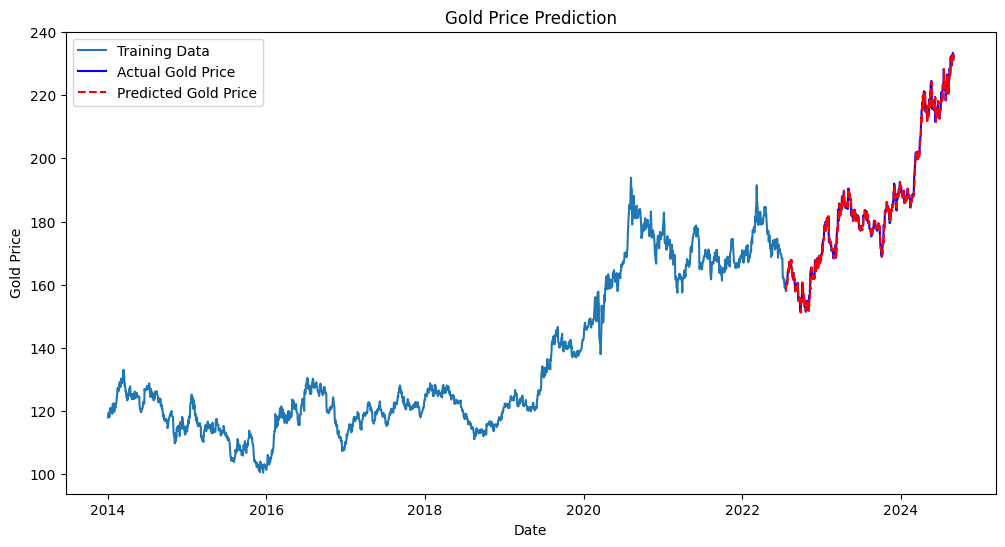

Root Mean Square Error: 1.6418357779927149
Mean Absolute Error: 1.1938131067854227


In [348]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use only the gold_Price column for the ARIMA model
gold_prices = cleaned_df['gold_Close'].dropna()  # Drop missing values

# Split the data into training and testing sets
train_size = int(len(gold_prices) * 0.8)  # 80% training, 20% testing
train_data, test_data = gold_prices[:train_size], gold_prices[train_size:]

# Define and fit the ARIMA model (p, d, q)
# p=4 - looking 4 days back
# d=1 - using the differences (?)
# q=2 - using 2 last errors (?)
model = ARIMA(train_data, order=(4, 1, 2)) 
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

# Forecasting one day ahead using the true data each time
history = list(train_data)  # Create a list from the training data
predictions = []

for t in range(len(test_data)):
    print(t)
    yhat = model_fit.forecast(steps=1)
    predictions.append(yhat)
    #history.append(test_data.iloc[t])
    model_fit = model_fit.append([test_data.iloc[t]])
    #model_fit = model_fit.append([yhat])

# Convert predictions to a list of numbers
predictions = [float(pred) for pred in predictions]

# Convert predictions to a DataFrame for easier plotting
pred_index = gold_prices.index[train_size:]  # Create an index for predictions
arima_predictions_df = pd.DataFrame(predictions, index=pred_index, columns=['Predictions'])

# Combine predictions and actual test data
test_data = test_data.to_frame()
arima_predictions_df = test_data.join(arima_predictions_df)
print(arima_predictions_df)
# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(arima_predictions_df.index, arima_predictions_df['gold_Close'], color='blue', label='Actual Gold Price')
plt.plot(arima_predictions_df.index, arima_predictions_df['Predictions'], color='red', linestyle='--', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(arima_predictions_df['gold_Close'], arima_predictions_df['Predictions']))
mae = mean_absolute_error(arima_predictions_df['gold_Close'], arima_predictions_df['Predictions'])

print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

LR: 
Root Mean Squared Error (RMSE): 1.635357918772382
Mean Absolute Error (MAE): 1.2008843431040424

ARIMA 7 days forward

In [344]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use only the gold_Price column for the ARIMA model
gold_prices = cleaned_df['gold_Close'].dropna()  # Drop missing values

# Split the data into training and testing sets
train_size = int(len(gold_prices) * 0.8)  # 80% training, 20% testing
train_data, test_data = gold_prices[:train_size], gold_prices[train_size:]
print(test_data)
# Define and fit the ARIMA model (p, d, q)
# p=4 - looking 4 days back
# d=1 - using the differences (?)
# q=2 - using 2 last errors (?)
model = ARIMA(train_data, order=(7, 1, 2)) 
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

# Forecasting one day ahead using the true data each time
history = list(train_data)  # Create a list from the training data
predictions = []
days_forward = 15
for t in range(len(test_data) - (days_forward - 1)):
    print(t)
    yhat = model_fit.forecast(steps=days_forward)
    print(yhat)
    #print(predictions)
    if t==0:
        #predictions.append(yhat)
        for i in range(days_forward):
            predictions.append(yhat.iloc[t+i])
            model_fit = model_fit.append([test_data.iloc[t+i]])
            #print(f'appended: {[test_data.iloc[i]]}')
    else:
        predictions.append(yhat.iloc[days_forward-1])
        print(f'pred appended: {yhat.iloc[days_forward-1]}')
        #history.append(test_data.iloc[t])
        model_fit = model_fit.append([test_data.iloc[t+days_forward-1]])
        #print(f'appended: {[test_data.iloc[6]]}')
    #model_fit = model_fit.append([yhat])

# Convert predictions to a list of numbers
print(predictions)
predictions = [float(pred) for pred in predictions]

# Convert predictions to a DataFrame for easier plotting
pred_index = gold_prices.index[train_size:]  # Create an index for predictions
arima_predictions_df = pd.DataFrame(predictions, index=pred_index, columns=['Predictions'])

# Combine predictions and actual test data
test_data = test_data.to_frame()
arima_predictions_df = test_data.join(arima_predictions_df)
print(arima_predictions_df)
# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(arima_predictions_df.index, arima_predictions_df['gold_Close'], color='blue', label='Actual Gold Price')
plt.plot(arima_predictions_df.index, arima_predictions_df['Predictions'], color='red', linestyle='-', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(arima_predictions_df['gold_Close'], arima_predictions_df['Predictions']))
mae = mean_absolute_error(arima_predictions_df['gold_Close'], arima_predictions_df['Predictions'])

print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Date
2022-07-21    160.270004
2022-07-22    160.669998
2022-07-25    160.229996
2022-07-26    160.039993
2022-07-27    161.669998
                 ...    
2024-08-26    232.759995
2024-08-27    233.389999
2024-08-28    231.750000
2024-08-29    232.949997
2024-08-30    231.289993
Name: gold_Close, Length: 574, dtype: float64


/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Python/3.9/site-p

                               SARIMAX Results                                
Dep. Variable:             gold_Close   No. Observations:                 2293
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -3697.797
Date:                Fri, 06 Sep 2024   AIC                           7415.594
Time:                        17:01:47   BIC                           7472.965
Sample:                             0   HQIC                          7436.514
                               - 2293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1386      0.016      8.509      0.000       0.107       0.171
ar.L2         -1.0128      0.015    -66.406      0.000      -1.043      -0.983
ar.L3          0.0164      0.023      0.705      0.4

KeyboardInterrupt: 

In [330]:
arima_predictions_df

,gold_Close,Predictions
Date,,
2022-07-21,160.270004,157.819554
2022-07-22,160.669998,157.626563
2022-07-25,160.229996,157.892053
2022-07-26,160.039993,158.170583
2022-07-27,161.669998,159.971369
...,...,...
2024-08-26,232.759995,232.231898
2024-08-27,233.389999,231.755846
2024-08-28,231.750000,229.167694


In [ ]:
predictions[0]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data['gold_Price'], color='blue', label='Actual Gold Price')
plt.plot(test_data.index, test_data['Predictions'], color='red', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylim(1800, 2000)
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Sample data
dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
gold_prices = pd.Series(np.random.randn(10), index=dates)
train_size = 7
predictions = np.random.randn(len(gold_prices) - train_size)
print(predictions)

# Index for predictions
index_for_predictions = gold_prices.index[train_size:]

# Debug output
print("Index for predictions:")
print(index_for_predictions)
print("Predictions:")
print(predictions)

# Create DataFrame
predictions_df = pd.DataFrame(predictions, index=index_for_predictions, columns=['Predictions'])
print("Predictions DataFrame:")
print(predictions_df)


In [ ]:
all_data_df.to_csv('all_data.csv', index=False)

In [ ]:
all_data_df['gold_price_to_predict'] = all_data_df['gold_Close'].shift(-1)
all_data_df['gold_price_yesterday'] = all_data_df['gold_Close'].shift(1)
all_data_df['gold_price_2days'] = all_data_df['gold_Close'].shift(2)
all_data_df['gold_price_3days'] = all_data_df['gold_Close'].shift(3)
all_data_df

In [ ]:
all_data_df

In [ ]:
from sklearn.model_selection import train_test_split

X = all_data_df.drop(columns=['gold_price_to_predict'])

# Extract y
y = all_data_df['gold_price_to_predict']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

            gold_Close  ARIMA_Predictions  gold_price_to_predict  \
Date                                                               
2022-07-21  160.270004         157.819554                    NaN   
2022-07-22  160.669998         160.108804             160.669998   
2022-07-23         NaN                NaN             160.229996   
2022-07-25  160.229996         160.911654                    NaN   
2022-07-26  160.039993         160.496334             160.039993   
...                ...                ...                    ...   
2024-08-26  232.759995         232.401146                    NaN   
2024-08-27  233.389999         232.472128             233.389999   
2024-08-28  231.750000         233.126219             231.750000   
2024-08-29  232.949997         231.961208             232.949997   
2024-08-30  231.289993         233.218531             231.289993   

            Linear_Reg_Predictions  
Date                                
2022-07-21                     NaN  
2022

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Drop rows with NaN in X_test and y_test
X_test_dropped = X_test.dropna()
y_test_dropped = y_test.loc[X_test_dropped.index]  # Drop NaNs based on indices in X_test_dropped

# Ensure that y_test_dropped does not contain NaN values
X_test_dropped = X_test_dropped.dropna()
y_test_dropped = y_test_dropped.dropna()

# Check if indices still match after dropping NaNs
common_index = X_test_dropped.index.intersection(y_test_dropped.index)
X_test_dropped = X_test_dropped.loc[common_index]
y_test_dropped = y_test_dropped.loc[common_index]
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_dropped, y_train_dropped)

# Predict on test data
y_pred = model.predict(X_test_dropped)
pred_index = X_test_dropped.index

# Create a DataFrame for predictions
linear_reg_predictions_df = pd.DataFrame(y_pred, index=pred_index, columns=['Predictions'])
# Assuming `test_data` is the DataFrame with actual values and it has the same index as `X_test_dropped`
# Combine predictions and actual test data
test_data = y_test_dropped.to_frame()  # Ensure test_data is a DataFrame
linear_reg_predictions_df = test_data.join(linear_reg_predictions_df)
linear_reg_predictions_df.index = linear_reg_predictions_df.index + pd.DateOffset(days=1)


# Combine with test data if needed
#test_data_combined = test_data.join(all_predictions)

# Print the combined DataFrame to verify
print(all_predictions)



#print(model.summary)
# Evaluate the model
mse = mean_squared_error(y_test_dropped, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_dropped, y_pred)
mae = mean_absolute_error(y_test_dropped, y_pred)


print("Linear Regression Model Summary")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

            gold_Close  ARIMA_Predictions  gold_price_to_predict  \
Date                                                               
2022-07-21  160.270004         157.819554             160.270004   
2022-07-22  160.669998         160.108804             160.669998   
2022-07-23         NaN                NaN             160.229996   
2022-07-25  160.229996         160.911654             160.229996   
2022-07-26  160.039993         160.496334             160.039993   
...                ...                ...                    ...   
2024-08-26  232.759995         232.401146             232.759995   
2024-08-27  233.389999         232.472128             233.389999   
2024-08-28  231.750000         233.126219             231.750000   
2024-08-29  232.949997         231.961208             232.949997   
2024-08-30  231.289993         233.218531             231.289993   

            Linear_Reg_Predictions  
Date                                
2022-07-21                     NaN  
2022

In [303]:
arima_predictions_df = arima_predictions_df.rename(columns={'Predictions': 'ARIMA_Predictions'})
linear_reg_predictions_df = linear_reg_predictions_df.rename(columns={'Predictions': 'Linear_Reg_Predictions'})
all_predictions = pd.concat([arima_predictions_df, linear_reg_predictions_df], axis=1)

# Print the combined DataFrame to verify
print(all_predictions)

            gold_Close  ARIMA_Predictions  gold_price_to_predict  \
Date                                                               
2022-07-21  160.270004         157.819554                    NaN   
2022-07-22  160.669998         160.108804             160.669998   
2022-07-23         NaN                NaN             160.229996   
2022-07-25  160.229996         160.911654                    NaN   
2022-07-26  160.039993         160.496334             160.039993   
...                ...                ...                    ...   
2024-08-26  232.759995         232.401146                    NaN   
2024-08-27  233.389999         232.472128             233.389999   
2024-08-28  231.750000         233.126219             231.750000   
2024-08-29  232.949997         231.961208             232.949997   
2024-08-30  231.289993         233.218531             231.289993   

            Linear_Reg_Predictions  
Date                                
2022-07-21                     NaN  
2022

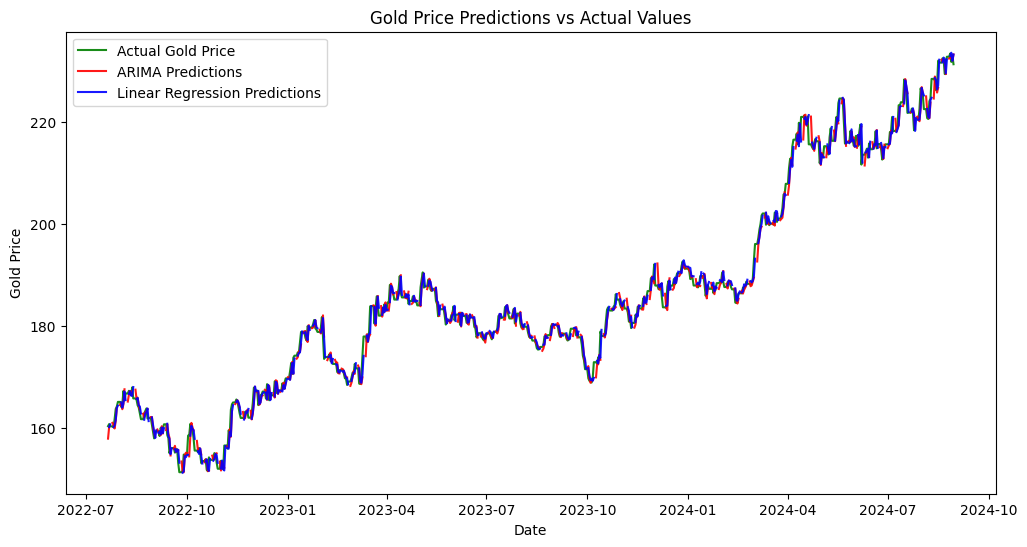

In [304]:
df = all_predictions
df['gold_price_to_predict'] = df['gold_Close'].combine_first(df['gold_price_to_predict'])

# Plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df.index, df['gold_price_to_predict'], label='Actual Gold Price', alpha=0.9,  color='green', linestyle='-')

# Plot ARIMA predictions
plt.plot(df.index, df['ARIMA_Predictions'], label='ARIMA Predictions', alpha=0.9, color='red', linestyle='-')

# Plot Linear Regression predictions
plt.plot(df.index, df['Linear_Reg_Predictions'], alpha=0.9, label='Linear Regression Predictions', color='blue', linestyle='-')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions vs Actual Values')
plt.legend()

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test_dropped,
    'Predicted': y_pred
})

# Display the first few rows of the DataFrame
print(comparison_df.head())

In [ ]:
print(y_pred)

In [ ]:
len(df_clean.columns)

In [ ]:
import numpy as np

In [ ]:
np.array([model.feature_names_in_, model.coef_]).T